In [13]:

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("./Online_retail_ii.xlsx")
data['TotalPrice'] = data['Price'] * data['Quantity']

## 전처리, 수량 & 가격 0 이상, 코드에 영문 들어간 것 일괄 제거
data = data[data['Quantity']>0]
data = data[data['Price']>0]
data['StockCode'] = data['StockCode'].astype(str)
data['StockCode_ch'] = data['StockCode'].apply(lambda x : 1 if x.isdecimal() else 0)
data = data[data['StockCode_ch']==1]


In [14]:

data['Invoice'] = data['Invoice'].astype(str)
data['Invoice_ch'] = data['Invoice'].apply(lambda x : 1 if x.isdecimal() else 0)
data = data[data['Invoice_ch']==1]

data['date'] = data['InvoiceDate'].apply(lambda x: x.strftime('%Y%m%d'))
data['date'] = data['InvoiceDate'].apply(lambda x: x.date())

data = data[['date', 'Invoice', 'StockCode', 'Description', 'Quantity', 'Price', 'Customer ID', 'Country']]

#### 날짜 별 그룹바이
df = data.groupby(['date', 'StockCode']).sum('Quantity')
df = df.reset_index()
df = df[['date', 'StockCode', 'Quantity']]



In [21]:
import multiprocessing


### 코드, 날짜리스트 만들기
code_list = df['StockCode'].unique()

data_all = pd.date_range(start='20091201', end='20101209', freq='D')    # tab 추가 시 20111209 까지
data_all = data_all.strftime('%Y%m%d')
data_all = pd.DataFrame(data_all)
data_all.columns = ['date']


array(['10002', '10120', '10125', ..., '22937', '21120', '22933'],
      dtype=object)

In [28]:


it1 = 10
it2 = 30
df_ts = pd.DataFrame()

# code_list
for i in code_list:
    df_a = df[df['StockCode']==i]
    df_a = pd.merge(data_all, df_a, how='left', on='date')
    df_a['Quantity'] = df_a['Quantity'].fillna(0)
    df_a['StockCode'] = df_a['StockCode'].fillna(i)
    j=0
    while j <= len(data_all) :
        a = df_a['Quantity'][j:j+it2].to_list()
        a = [i] + a
        a = pd.DataFrame(a).T
        df_ts = pd.concat([df_ts, a])
        j += it1
df_ts.rename(columns={"0" : 'StockCode'})


      0    1    2    3    4    5    6    7    8    9   ...   21   22   23  \
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  10002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# import pandas as pd
# import matplotlib.pyplot as plt
# 
# DROP_CANCEL = True
# DROP_DUPLICATE = True
# 
# file_path = "./Online_retail_ii.xlsx"
# 
# df = pd.read_excel(file_path, names=["InvoiceNo", "StockCode", "Description", "Quantity", "InvoiceDate", "UnitPrice", "CustomerID", "Country"])
# df['TotalPrice'] = df['Price'] * df['Quantity']
# df.head(5)

# # 단가 0 이하 제외
# # df = df[df['UnitPrice'] > 0]
# df.drop(df[df['UnitPrice'] <= 0].index, inplace=True)
# 
# # 배송비, 바우처 등 판매 내역이 아니거나 특수한 경우 제외
# # M(anual), D(iscount), POST(age), BANK CHARGES, AMAZON FEE, C(arriage), S(amples)
# # CRUK (commision), DOT(com postage), C2(arriage), gift (voucher), DSGS (commision)
# ignores = (
#     ["M", "D", "P", "BANK CHARGES", "AMAZON FEE", "C", "C2", "S", "CRUK", "PADS", "DOT"]
#     + ["gift_0001_10", "gift_0001_20", "gift_0001_30", "gift_0001_40", "gift_0001_50"]
#     + ["DCGS0003", "DCGS0004", "DCGS0069", "DCGS0070", "DCGS0076", "DCGSSBOY", "DCGSSGIRL"]
# )
# df['StockCode'].apply(lambda code : None if code in ignores else code)
# 
# if DROP_CANCEL:
#     df['StockCode'] = df['StockCode'].apply(lambda code : None if str(code)[0] == 'C' else code)
# 
# if DROP_DUPLICATE:
#     df['StockCode'] = df['StockCode'].apply(lambda code : code if str(code)[-1].isdecimal() else None)
# 
# df.dropna(inplace=True)
# df.reset_index(inplace=True)
# df.head()


# 가장 구매 빈도가 높은 상품 선택
# most_sell_idx = df.groupby('StockCode')['Quantity'].sum().argmax()
# most_sell_code = df.iloc[most_sell_idx]['StockCode']
# most_sell_name = df.iloc[most_sell_idx]['Description']

# # 구매 event가 많은 순으로 정렬
# tt = df.groupby('StockCode')['Quantity'].sum()
# tt.sort_values('Quantity')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,0,10002,12.0,0.0,7.0,73.0,0.0,49.0,2.0,12.0,...,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,10002,9.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,12.0,0.0
2,0,10002,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,48.0,0.0,0.0,140.0,0.0,0.0,3.0,1.0,0.0
3,0,10002,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,12.0,18.0,0.0,0.0,10.0,12.0,0.0,0.0,6.0,26.0
4,0,10002,0.0,48.0,0.0,0.0,140.0,0.0,0.0,3.0,...,0.0,0.0,4.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0
5,0,10002,12.0,18.0,0.0,0.0,10.0,12.0,0.0,0.0,...,12.0,0.0,30.0,0.0,0.0,0.0,0.0,1.0,12.0,24.0
6,0,10002,0.0,0.0,4.0,0.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,48.0,0.0,112.0,0.0,0.0,1.0
7,0,10002,12.0,0.0,30.0,0.0,0.0,0.0,0.0,1.0,...,36.0,0.0,200.0,216.0,0.0,0.0,4.0,16.0,0.0,0.0
8,0,10002,0.0,0.0,0.0,0.0,48.0,0.0,112.0,0.0,...,12.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,0.0,0.0
9,0,10002,36.0,0.0,200.0,216.0,0.0,0.0,4.0,16.0,...,0.0,72.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,48.0


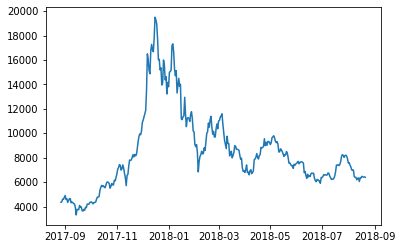

In [68]:
plt.plot(train['date'], train['price'])
plt.show()

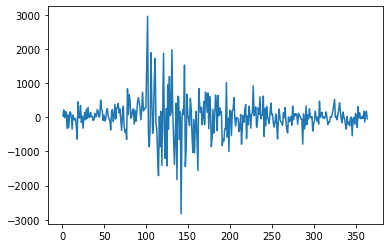

In [14]:
diff_1 = train['price'].diff().dropna()
plt.plot(diff_1)
plt.show()

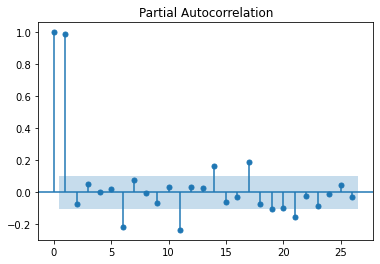

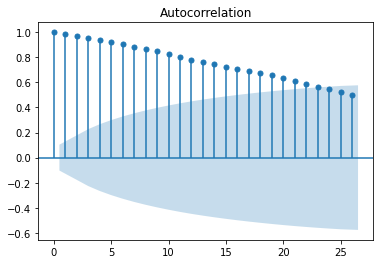

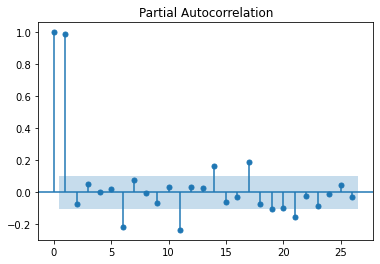

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train['price'])
plot_pacf(train['price']) ## pacf가 시차 1 이후 0으로 수렴하므로 ar1

In [82]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(train['price'], order = (0,1,1))
model_fit = model.fit(trend = 'c', full_output= True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  359
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2752.935
Method:                       css-mle   S.D. of innovations            517.700
Date:                Sun, 21 Mar 2021   AIC                           5511.870
Time:                        14:06:19   BIC                           5523.520
Sample:                             1   HQIC                          5516.502
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7018     29.361      0.194      0.846     -51.844      63.248
ma.L1.D.price     0.0748      0.055      1.358      0.174      -0.033       0.183
                                    Root

/Library/Python/3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


198.16978265077566

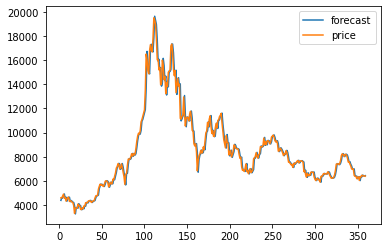

In [83]:
model_fit.plot_predict()

forecast = model_fit.forecast(steps=5)
pred_y = forecast[0].tolist()
test_y = test['price'].values

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test_y, pred_y)**0.5
RMSE

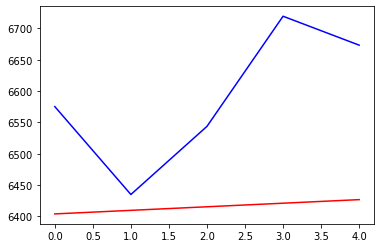

In [84]:
plt.plot(pred_y, color = 'red')
plt.plot(test_y, color = 'blue')
plt.show()

In [85]:
### auto_arima
from pmdarima.arima import auto_arima
model_arima = auto_arima(train['price'],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5511.698, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5511.878, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5513.186, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5515.183, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5512.045, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5511.309, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5513.212, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5515.263, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5513.194, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5515.184, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5515.020, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5508.039, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5515.170, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5517.175, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5516.787, Time=0.37 sec

Best mode

TypeError: invalid type promotion

In [86]:
model = ARIMA(train['price'], order = (2,1,3))
model_fit = model.fit(trend = 'c', full_output= True, disp = True)
print(model_fit.summary())

/Library/Python/3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  359
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2751.333
Method:                       css-mle   S.D. of innovations            515.371
Date:                Sun, 21 Mar 2021   AIC                           5516.666
Time:                        14:07:38   BIC                           5543.849
Sample:                             1   HQIC                          5527.475
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6622     32.455      0.174      0.862     -57.948      69.273
ar.L1.D.price     0.2996      0.251      1.195      0.232      -0.192       0.791
ar.L2.D.price     0.5320      0.214     

/Library/Python/3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [87]:
forecast = model_fit.forecast(steps=5)
pred_y = forecast[0].tolist()
test_y = test['price'].values
RMSE = mean_squared_error(test_y, pred_y)**0.5
RMSE

201.3957020625646

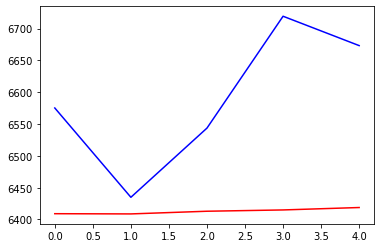

In [88]:
plt.plot(pred_y, color = 'red')
plt.plot(test_y, color = 'blue')
plt.show()

In [98]:
import numpy as np
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3]*4, dtype='int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': [1,2,3,4]})

In [114]:
df2.groupby(['E']).filter(lambda x: x['E'].count() >= 2)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,1
1,1.0,2013-01-02,1.0,3,train,2
2,1.0,2013-01-02,1.0,3,test,3
3,1.0,2013-01-02,1.0,3,train,4


In [109]:
df2.groupby(['E'])['B'].filter(lambda x: x.count() > 1)


0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]